In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# importamos el dataset honeyproduction
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.shape

(626, 8)

In [4]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [9]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [10]:
# Obtencion de produccion promedio por año
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [18]:
# Vamos a predecir la prod total en funcion del año
X = prod_per_year['year']
y = prod_per_year['totalprod']

In [19]:
X.ndim

1

In [20]:
X

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

In [21]:
X=X.values.reshape(-1, 1) # convierto a lista
X.ndim

2

In [22]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [23]:
# Dividimos los datos para entrenamiento y para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42) # 30% test

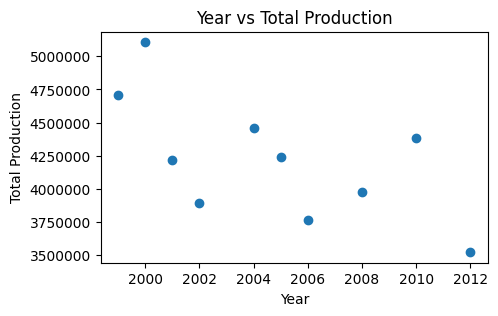

In [27]:
# Generar una grafica
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train)
plt.ticklabel_format(style='plain') # para quitar notacion cientifica
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Year vs Total Production')
plt.show()

In [28]:
# Creacion de la instancia del modelo
regr = LinearRegression()

In [29]:
# Ajuste del modelo
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
# Imprimo coeficientes
print(f'Coeficiente: {regr.coef_}')

Coeficiente: [-69679.66404798]


In [31]:
# Imprimo intercepto
print(f'Intercepto: {regr.intercept_}')

Intercepto: 143913663.68943897


In [33]:
# Realizamos la prediccion
y_predict = regr.predict(X_test)
y_predict

array([4066577.94514877, 3927218.61705282, 4693694.92158058,
       3787859.28895688, 4345296.60134068])

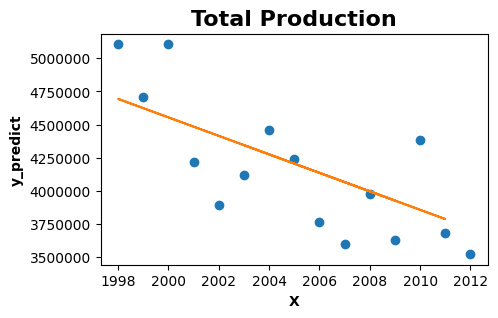

In [38]:
plt.figure(figsize=(5,3))
plt.plot(X, y, 'o')
plt.plot(X_test, y_predict)
plt.xlabel('X', fontweight='bold')
plt.title('Total Production', fontweight='bold', fontsize=16)
plt.ylabel('y_predict', fontweight='bold')
plt.ticklabel_format(style='plain')
plt.show()

#### Como hago para predecir por ejemplo la produccion desde el año 2013 al 2050
$y=mx+b$

In [45]:
pendiente = regr.coef_[0]
intercepto = regr.intercept_
año = 2000

In [46]:
pendiente

-69679.66404797717

In [47]:
intercepto

143913663.68943897

In [48]:
produccion = pendiente * año + intercepto
produccion

4554335.59348461

In [52]:
print(f'La producción para el {año} sera de: {round(produccion, 2)}')

La producción para el 2000 sera de: 4554335.59


### Coeficiente de determinacion $R^2$
- Porcentaje de variacion que puede ser explicado por el modelo

In [53]:
regr.score(X_test, y_test)

0.670578073909426

#### Con el año de producción puedo explicar el 67% de la variación

#### Producción del 2013-2050

In [ ]:
X_future = np.array(range(2013, 2051)).reshape(-1,1)
X_future.shape
X_future

In [56]:
future_predict = regr.predict(X_future)

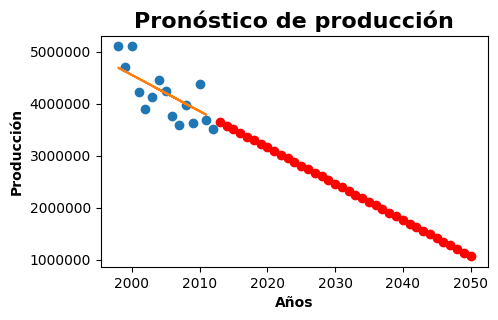

In [62]:
plt.figure(figsize=(5,3))
plt.plot(X, y, 'o')
plt.plot(X_test, y_predict) # línea de la predicción
plt.scatter(X_future, future_predict, color='r') # pronóstico de 2013-2050
plt.xlabel('Años', fontweight='bold')
plt.title('Pronóstico de producción', fontweight='bold', fontsize=16)
plt.ylabel('Producción', fontweight='bold')
plt.ticklabel_format(style='plain')
plt.show()